# **Autoencoders**

* An autoencoder is a neural network that is trained to produce as output a duplicate of its input

* The network may be viewed as consisting of two parts:
  * An encoder that maps the original input x into a latent space z that is called Code (of the input): z = f(x)
    
  * A decoder that produces a reconstruction r = g(z)

* The goal is to generate an output as close as possible to the original input: x ≈ r

* The loss function is expressed as L(x, g(f(x))

* For instance, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image.

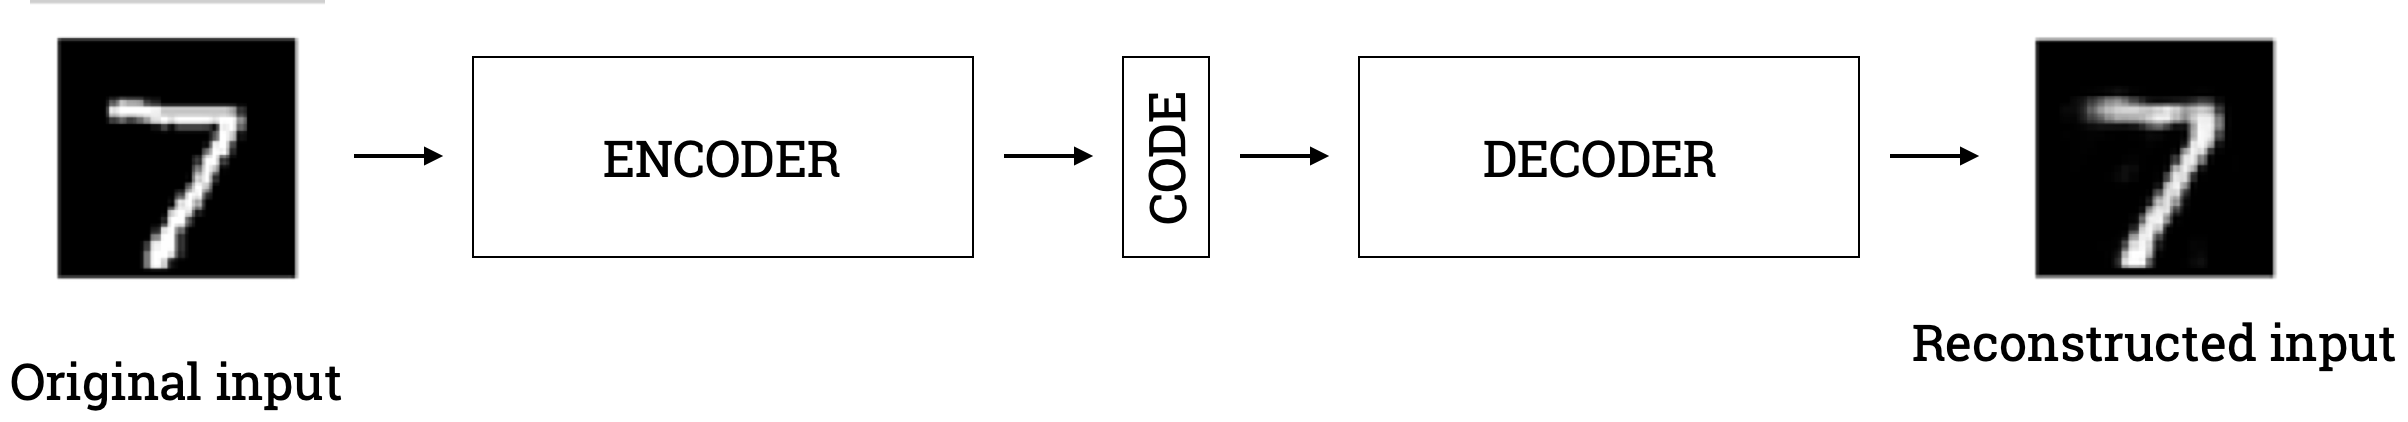

* An autoencoder learns to compress the data while minimizing the reconstruction error.


* The code of an autoencoder can have useful information about the input domain

* An autoencoder whose code size is lower than the input one is called under-complete

* An autoencoder whose code size is bigger than the input one is called over-complete

* We'll start with a simple autoencoder, with a single fully-connected neural layer as encoder and as decoder

* We will use Fashion MNIST dataset

* Each image in this dataset is 28x28 pixels

* Let's prepare our input data.

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()

print (x_train.shape)
print (x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


* We're discarding the labels (since we're only interested in encoding/decoding the input images).

* We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

In [ ]:
import numpy as np

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val = train_test_split(x_train, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_val.shape)

(45000, 784)
(15000, 784)


* Now we will build the simple autoencoder

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# this is the size of our encoded representations
# 32 floats -> compression of factor that is equal to input / 32
# In our case we have a compression of factor 24.5

encoding_dim = 32

input_img = Input(shape=(x_train.shape[1],))
# "code" is the encoded representation of the input
code = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(code)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded, name = 'simple_autoencoder')

In [ ]:
autoencoder.summary()

Model: "simple_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='rmsprop', loss='mse')

* Now let's train our autoencoder:

In [ ]:
EPOCHS = 20
BATCH_SIZE = 256

history = autoencoder.fit(x_train, x_train, epochs=EPOCHS,
                          batch_size=BATCH_SIZE,
                          validation_data=(x_val, x_val))

Epoch 1/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0569 - val_loss: 0.0354
Epoch 2/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0309 - val_loss: 0.0274
Epoch 3/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0257 - val_loss: 0.0242
Epoch 4/20
176/176 [==============================] - 1s 3ms/step - loss: 0.0228 - val_loss: 0.0215
Epoch 5/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0209 - val_loss: 0.0202
Epoch 6/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0197 - val_loss: 0.0196
Epoch 7/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0187 - val_loss: 0.0180
Epoch 8/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0180 - val_loss: 0.0171
Epoch 9/20
176/176 [==============================] - 1s 3ms/step - loss: 0.0174 - val_loss: 0.0172
Epoch 10/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0170 - val_loss: 0.0166

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center')
    plt.show()

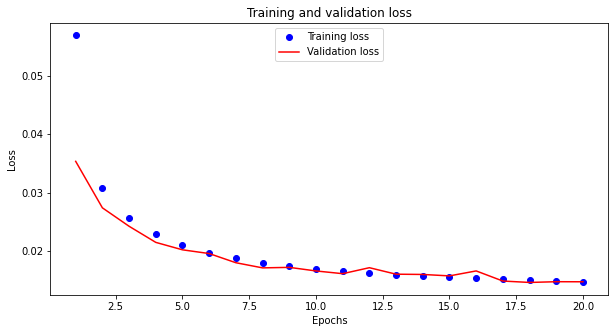

In [ ]:
plot_loss(history)

* We can see the reconstructed images

In [ ]:
reconstructed = autoencoder.predict(x_test)

In [ ]:
def plotImage(x_test, reconstructed):
  n = 10  # how many images we will display
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(reconstructed[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

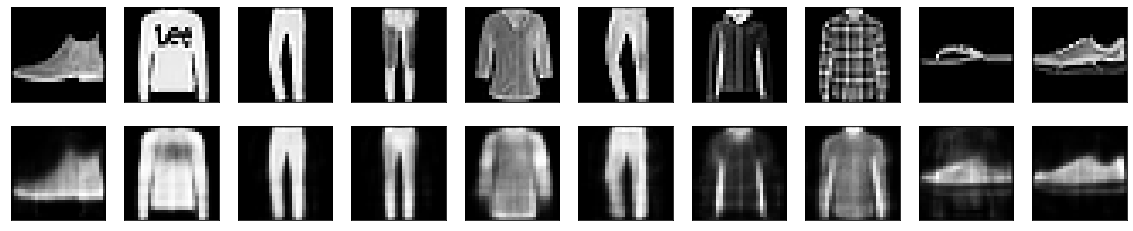

In [ ]:
plotImage(x_test, reconstructed)

* If a single hidden layer is not enough, we can extend the autoencoder along the depth dimension.

In [ ]:
hidden_size = 64
encoding_dim = 32

input_img = Input(shape=(x_train.shape[1],))
hidden1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(encoding_dim, activation='relu')(hidden1)

hidden2 = Dense(hidden_size, activation='relu')(code)
out = Dense(784, activation='sigmoid')(hidden2)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, out, name = 'multilayed_autoencoder')

autoencoder.summary()

autoencoder.compile(optimizer='rmsprop', loss='mse')

Model: "multilayed_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               50960     
Total params: 105,392
Trainable params: 105,392
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = autoencoder.fit(x_train, x_train, epochs=EPOCHS,
                          batch_size=BATCH_SIZE,
                          validation_data=(x_val, x_val))

Epoch 1/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0564 - val_loss: 0.0381
Epoch 2/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0326 - val_loss: 0.0319
Epoch 3/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0277 - val_loss: 0.0276
Epoch 4/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0252 - val_loss: 0.0245
Epoch 5/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0235 - val_loss: 0.0223
Epoch 6/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0222 - val_loss: 0.0214
Epoch 7/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0211 - val_loss: 0.0211
Epoch 8/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0203 - val_loss: 0.0197
Epoch 9/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0196 - val_loss: 0.0196
Epoch 10/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0189 - val_loss: 0.0187

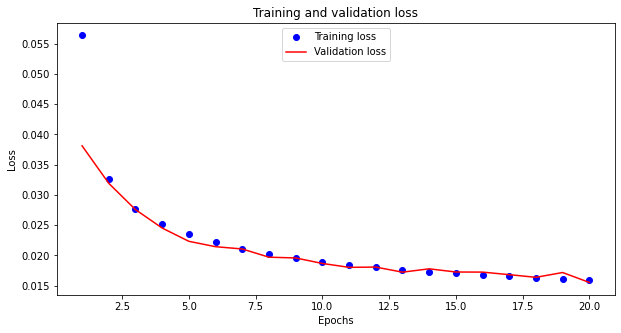

In [ ]:
plot_loss(history)

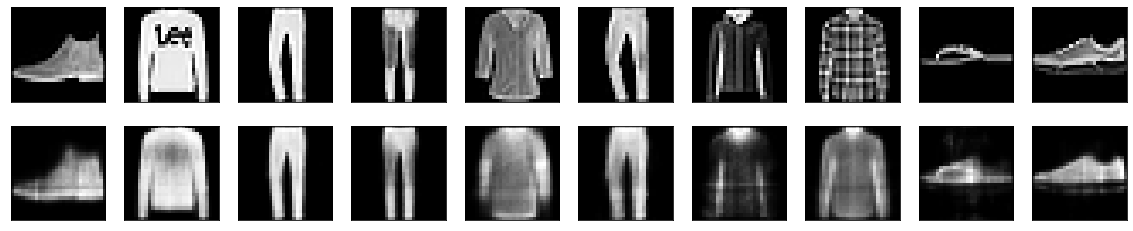

In [ ]:
reconstructed = autoencoder.predict(x_test)

plotImage(x_test, reconstructed)

* Let's try with a convolutional approach

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

input_img = Input(shape=(28, 28, 1))

conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 8
pool1 = MaxPooling2D((2, 2))(conv1) #14 x 14 x 8
conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 16

#decoder
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv2) # 14 x 14 x 16
up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 16
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded, name = 'convolutional_autoencoder')

autoencoder.summary()

autoencoder.compile(optimizer='rmsprop', loss='mse')

Model: "convolutional_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 2

In [ ]:
history = autoencoder.fit(x_train, x_train,
                          epochs=EPOCHS,
                          batch_size=BATCH_SIZE,
                          validation_data=(x_val, x_val))

Epoch 1/20
176/176 [==============================] - 1s 8ms/step - loss: 0.0277 - val_loss: 0.0123
Epoch 2/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0107 - val_loss: 0.0094
Epoch 3/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0087 - val_loss: 0.0078
Epoch 4/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 5/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 6/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 7/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 8/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 9/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 10/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0042 - val_loss: 0.0044

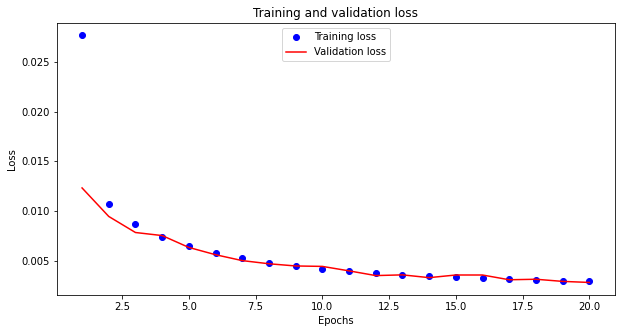

In [ ]:
plot_loss(history)

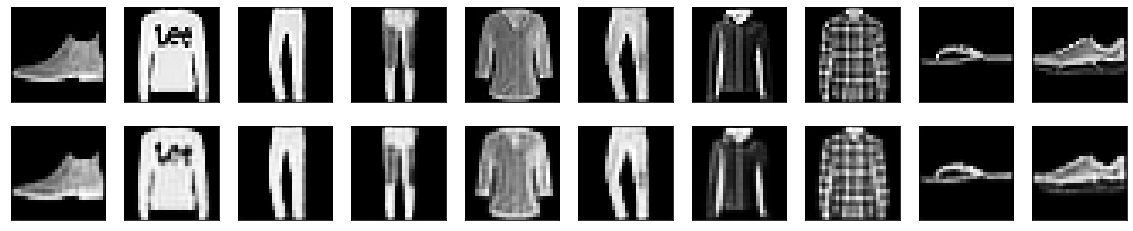

In [ ]:
reconstructed = autoencoder.predict(x_test)

plotImage(x_test, reconstructed)

* Regularized autoencoder allows to prevent that the autoencoders learn the identity function and to improve their ability to capture important information and learn richer representations

* In fact, it ideally enables to choose the code size and the capacity of the encoder and decoder according to the complexity of the input data distribution

* To achieve this we have to change the loss function

* The new loss function encourages the model to have other properties besides the ability to copy its input, e.g.:
  * sparsity of the representation
  * robustness to noise or to missing inputs

* Short list of regularized autoencoders:
  * Sparse Autoencoders
  * Denoising Autoencoders



* Sparse Autoencoders add a sparsity penalty on the code layer to the loss function: L(x, g(f(x)) + Ω(z)

  * The component Ω(z) penalizes the activations of too many nodes in the code layer
  * This constraint is called the sparsity constraint. It is sparse because each unit only activates to a certain type of inputs, not all of them

* In Keras, this can be done by adding an activity_regularizer to our Dense layer:

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
from tensorflow.keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
code = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(code)

autoencoder = Model(input_img, decoded)

autoencoder.summary()

autoencoder.compile(optimizer='rmsprop', loss='mse')


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = autoencoder.fit(x_train, x_train, epochs=EPOCHS,
                          batch_size=BATCH_SIZE,
                          validation_data=(x_val, x_val))

Epoch 1/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0612 - val_loss: 0.0391
Epoch 2/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0334 - val_loss: 0.0303
Epoch 3/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0279 - val_loss: 0.0263
Epoch 4/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0251 - val_loss: 0.0240
Epoch 5/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0234 - val_loss: 0.0231
Epoch 6/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0223 - val_loss: 0.0217
Epoch 7/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0214 - val_loss: 0.0207
Epoch 8/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0208 - val_loss: 0.0211
Epoch 9/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0202 - val_loss: 0.0204
Epoch 10/20
176/176 [==============================] - 1s 4ms/step - loss: 0.0198 - val_loss: 0.0195

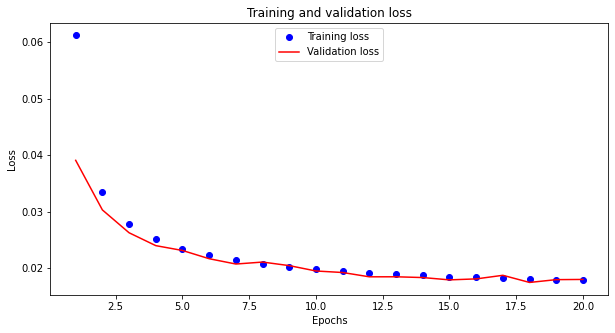

In [ ]:
plot_loss(history)

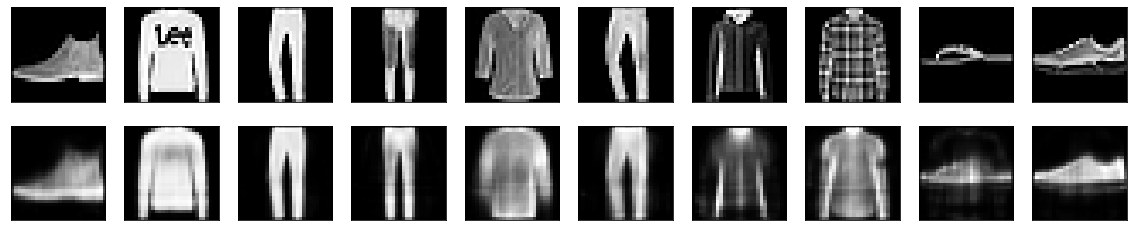

In [ ]:
reconstructed = autoencoder.predict(x_test)

plotImage(x_test, reconstructed)

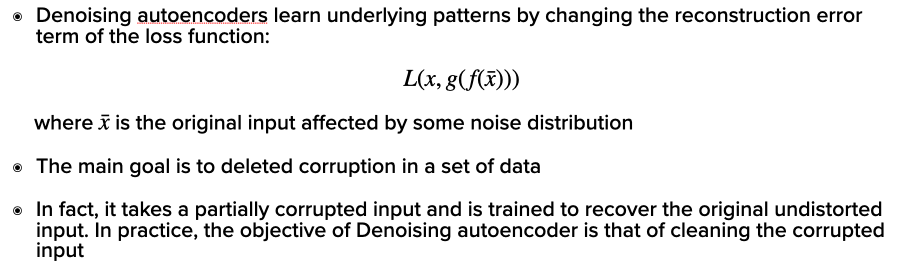

* Adding random noise to the images

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_val_noisy = x_val + noise_factor * tf.random.normal(shape=x_val.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_val_noisy = tf.clip_by_value(x_val_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

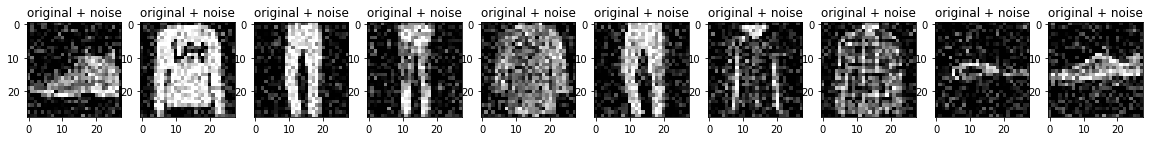

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(x_test_noisy[i].numpy().reshape(28,28))
    plt.gray()
plt.show()

In [ ]:
input_img = Input(shape=(28, 28, 1))

conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 8
pool1 = MaxPooling2D((2, 2))(conv1) #14 x 14 x 8
conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 16

#decoder
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv2) # 14 x 14 x 16
up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 16
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded, name = 'convolutional_autoencoder')

autoencoder.summary()

autoencoder.compile(optimizer='rmsprop', loss='mse')

Model: "convolutional_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 2

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=EPOCHS, batch_size = BATCH_SIZE,
                validation_data=(x_val_noisy, x_val))

Epoch 1/20
176/176 [==============================] - 1s 8ms/step - loss: 0.0301 - val_loss: 0.0167
Epoch 2/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0147 - val_loss: 0.0134
Epoch 3/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0125 - val_loss: 0.0117
Epoch 4/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 5/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0104 - val_loss: 0.0103
Epoch 6/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0098 - val_loss: 0.0095
Epoch 7/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 8/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 9/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0087 - val_loss: 0.0086
Epoch 10/20
176/176 [==============================] - 1s 7ms/step - loss: 0.0084 - val_loss: 0.0083

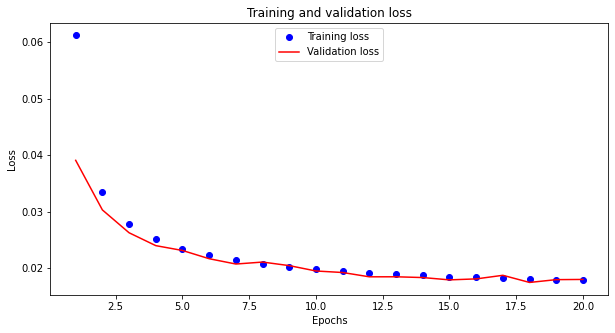

In [ ]:
plot_loss(history)

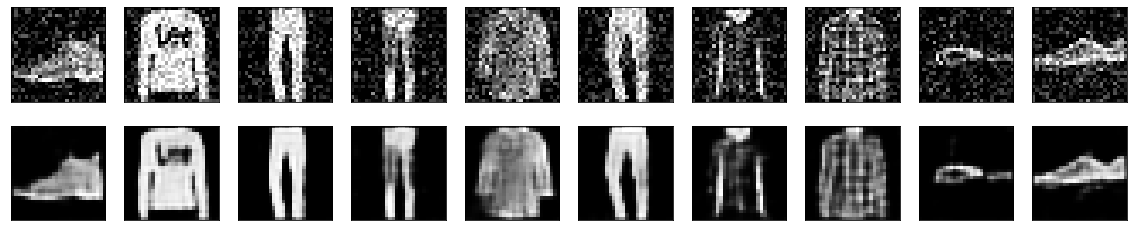

In [ ]:
reconstructed = autoencoder.predict(x_test_noisy)

plotImage(x_test_noisy.numpy(), reconstructed)